In [1]:
import pandas as pd               #importing essential libraries

In [2]:
url = 'https://github.com/sathvikbhupal1/MachineLearning/blob/main/MachineLearning_Datasets/Real%20estate.csv?raw=true'   
df = pd.read_csv(url, index_col=0)                      #importing the dataset from my github account and reading it through .read_csv function
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [3]:
df.columns                    #checking the number of columns and column names

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [4]:
df.info()                        #using .info() function to check for the null values and data types of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [5]:
import seaborn as sn                                #importing essential libraries 
import matplotlib.pyplot as plt 

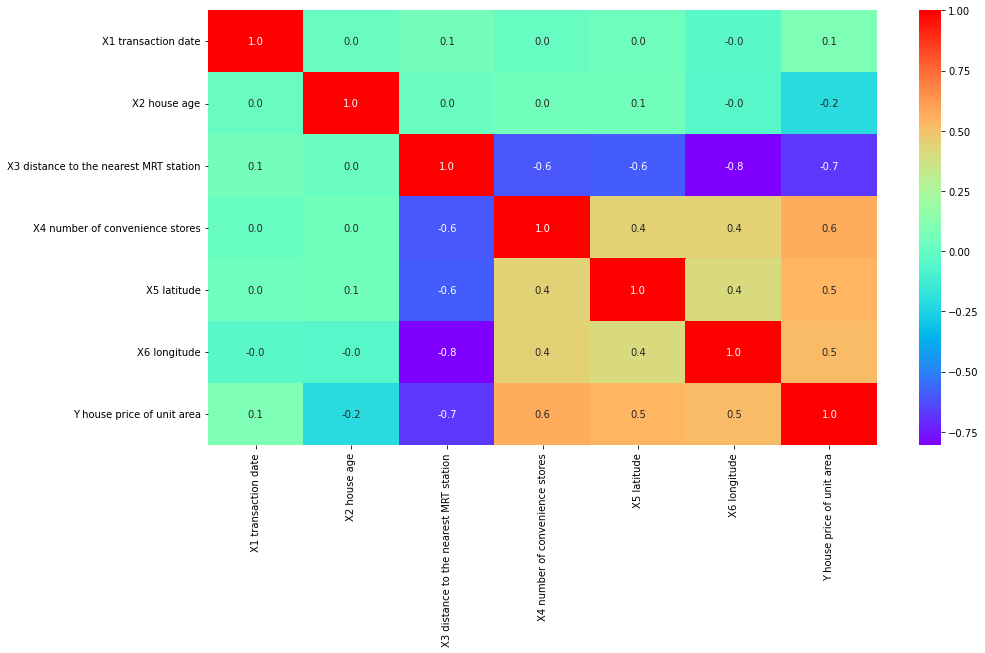

In [6]:
corr = df.corr()                                 #correlation of the data can be found through .corr() function 

plt.figure(figsize=(15,8))
sn.heatmap(corr, annot=True, fmt=".1f", cmap="rainbow")              #correlation of the data can be plotted as a heatmap with the help of seaborn library
plt.show()

In [7]:
X = df.drop(columns=['Y house price of unit area' ])        #splitting the data into features (X) and target (Y) to train further
Y = df['Y house price of unit area']

In [8]:
X.shape              #checking its total number of rows & columns to see if its split properly

(414, 6)

In [9]:
Y.shape               #checking its total number of rows & columns to see if its split properly

(414,)

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression                                         #importing essential libraries 
from sklearn.metrics import accuracy_score,  mean_absolute_error, mean_squared_error
import numpy as np


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)    #splitting the data into train and test portions 


Score: 68.0 %
MAE: 5.30535569007425
MSE: 53.50561912450548
RMSE: 7.314753524521895


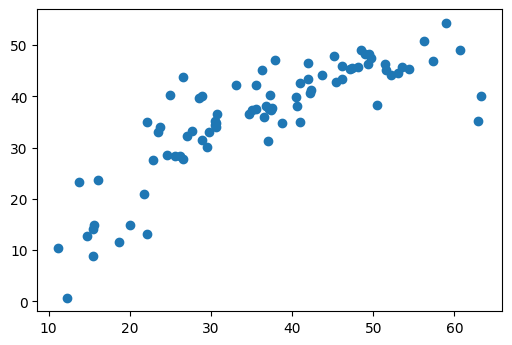

In [16]:
model = LinearRegression()                                    #building linear regression model   
model = model.fit(X_train, y_train)                           #applying the linear regression model to the training data 

predictions = model.predict(X_test)                           #predicting using test_data on the basis of model performance on training data

print("Score:", round(model.score(X_test, y_test),2)*100 ,'%')      #checking the score by comparing the feature test data to target test data and compute accuracy
plt.figure(dpi=100)
plt.scatter(y_test, predictions)                             #plotting the predictions datapoints on graph

print("MAE:", mean_absolute_error(y_test, predictions))           #printing Mean_absolute_error to evaluate model performance
print('MSE:', mean_squared_error(y_test, predictions))            #printing Mean_squared_error to evaluate model performance
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))   #printing root_Mean_absolute_error to evaluate model performance
